In [ ]:
!pip install lime
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GALAXIES.zip to GALAXIES.zip


In [ ]:
from zipfile import ZipFile

zip_path = 'GALAXIES.zip'  # exact name of uploaded file
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/galaxies')

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from zipfile import ZipFile

zip_path = 'GALAXIES.zip'  # Ensure the file is uploaded
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/galaxies')

labels_df = pd.read_csv('/content/galaxies/GALAXIES/2class_list.csv')
image_dir = '/content/galaxies/GALAXIES/DATA'
X, y = [], []

for _, row in tqdm(labels_df.iterrows(), total=len(labels_df)):
    image_id = row['CATAID']
    label = row['TARGET']
    image_path = os.path.join(image_dir, f"{image_id}_giH.png")
    if os.path.exists(image_path):
        img = cv2.imread(image_path)
        img = cv2.resize(img, (128, 128))
        X.append(img)
        y.append(label)

X = np.array(X).astype('float32') / 255.0
y = np.array(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

100%|██████████| 5900/5900 [00:11<00:00, 527.93it/s]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import tensorflow as tf
import numpy as np
import random

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

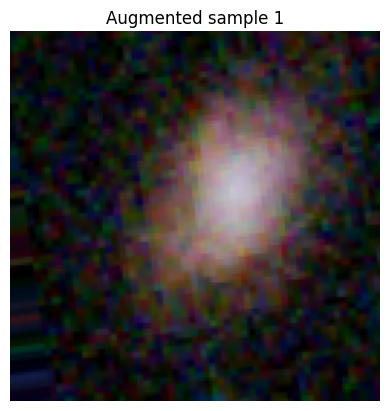

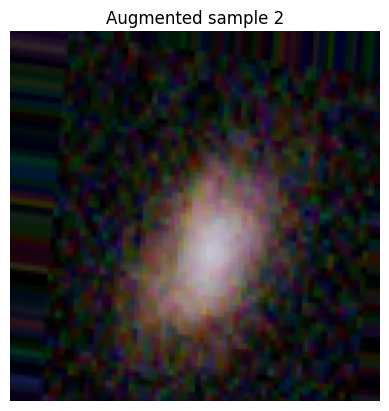

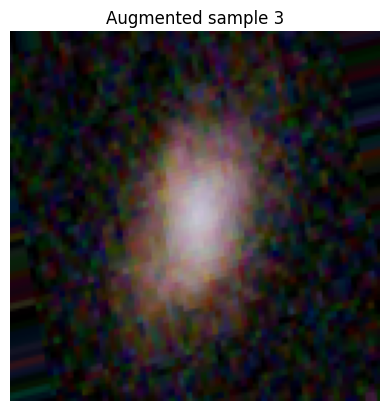

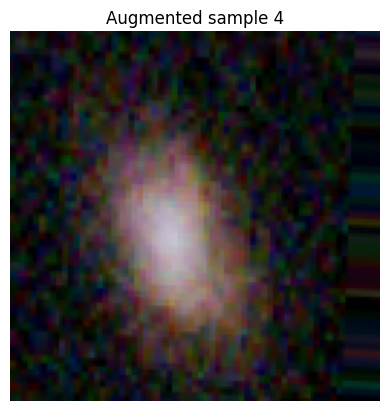

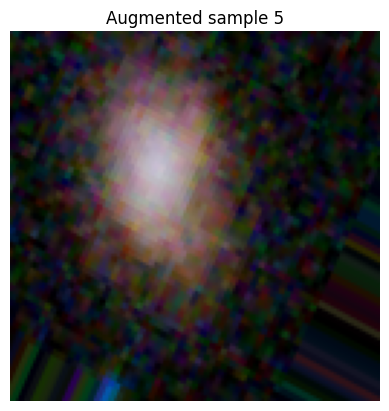

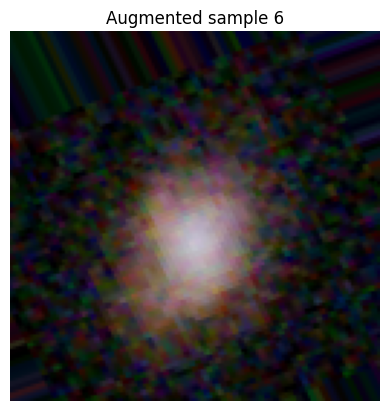

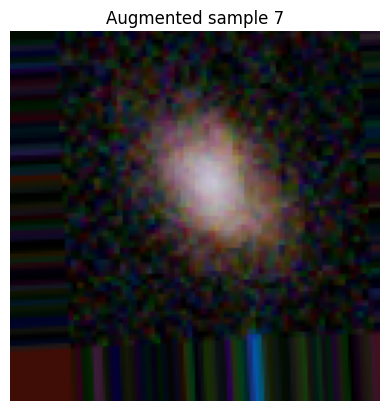

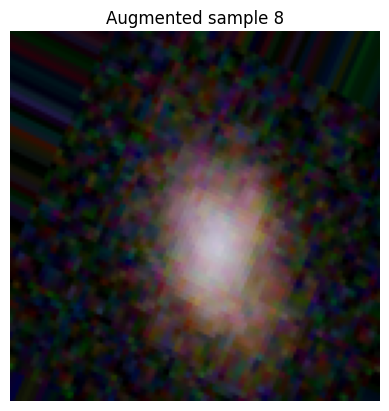

In [ ]:
import matplotlib.pyplot as plt

# Visualize 8 augmented versions of the first training image
count = 0
for X_batch in datagen.flow(X_train[:1], batch_size=1):
    plt.imshow(X_batch[0])
    plt.axis('off')
    plt.title(f'Augmented sample {count+1}')
    plt.show()

    count += 1
    if count >= 8:
        break

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

In [ ]:
inputs = Input(shape=(128, 128, 3))

x = Conv2D(32, (3,3), activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3,3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3,3), activation='relu', name='last_conv')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

outputs = Dense(1, activation='sigmoid')(x)

model2 = Model(inputs, outputs)
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

inputs = Input(shape=(128, 128, 3))

x = Conv2D(32, (3,3), activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3,3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3,3), activation='relu', name='last_conv')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

outputs = Dense(1, activation='sigmoid')(x)

model2 = Model(inputs, outputs)

model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model2.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ last_conv (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,942,273 (49.37 MB)

 Trainable params: 12,940,801 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

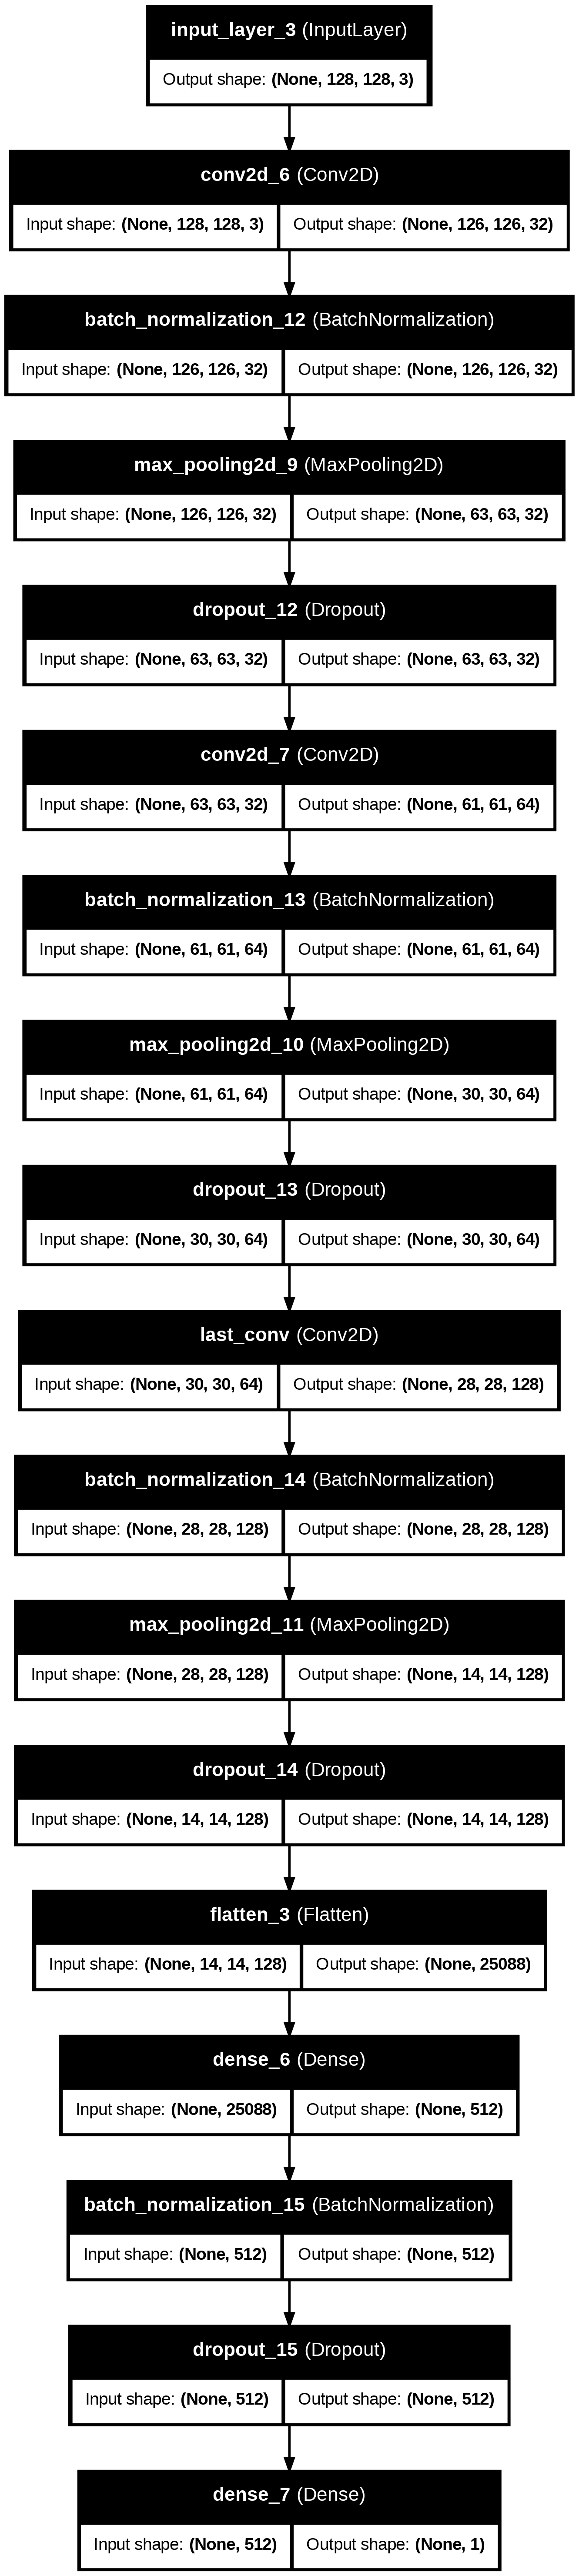

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model2, to_file='model2_architecture.png', show_shapes=True, show_layer_names=True)

In [ ]:
from sklearn.utils import class_weight

class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i: class_weights_array[i] for i in range(len(class_weights_array))}

history = model2.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=20,
    class_weight=class_weights
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.7384 - loss: 0.7156 - val_accuracy: 0.5093 - val_loss: 7.5387
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.8128 - loss: 0.4349 - val_accuracy: 0.7525 - val_loss: 0.6274
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.8090 - loss: 0.4246 - val_accuracy: 0.7619 - val_loss: 0.6532
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.8364 - loss: 0.3873 - val_accuracy: 0.8602 - val_loss: 0.3461
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.8321 - loss: 0.3807 - val_accuracy: 0.8212 - val_loss: 0.4381
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.8246 - loss: 0.3936 - val_accuracy: 0.8678 - val_loss: 0.3116
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.8340 - loss: 0.3875 - val_accuracy: 0.8551 - val_loss: 0.3306
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.8559 - loss: 0.3463 - val_accu

In [ ]:
class_weights_array = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: class_weights_array[i] for i in range(len(class_weights_array))}

history2 = model2.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=20,
    class_weight=class_weights
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.7277 - loss: 0.7311 - val_accuracy: 0.5093 - val_loss: 9.6237
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.8015 - loss: 0.4612 - val_accuracy: 0.5093 - val_loss: 6.2545
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 285s 2s/step - accuracy: 0.8102 - loss: 0.4389 - val_accuracy: 0.7432 - val_loss: 1.6322
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.8372 - loss: 0.3702 - val_accuracy: 0.6932 - val_loss: 1.0919
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 314s 2s/step - accuracy: 0.8278 - loss: 0.3887 - val_accuracy: 0.8153 - val_loss: 0.4443
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.8467 - loss: 0.3617 - val_accuracy: 0.8508 - val_loss: 0.3441
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step - accuracy: 0.8425 - loss: 0.3546 - val_accuracy: 0.8441 - val_loss: 0.4195
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.8461 - loss: 0.3481 - val_accu

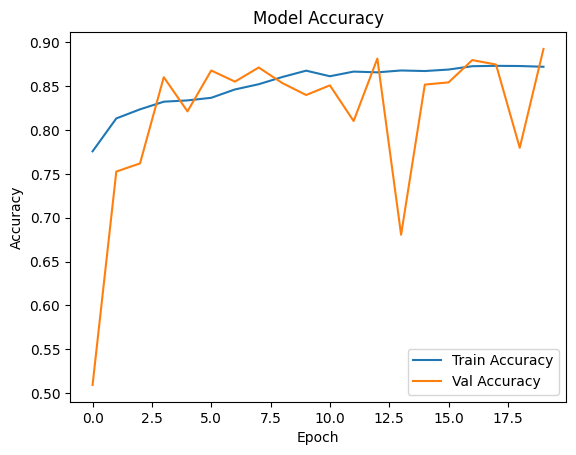

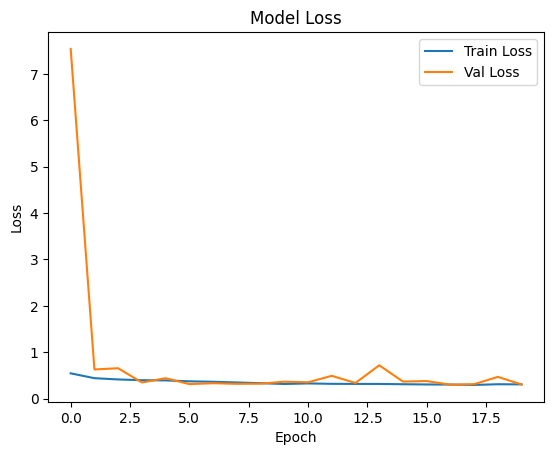

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig('accuracy_plot.png')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('loss_plot.png')
plt.show()

In [ ]:
model2.save('galaxy_classifier_model2.h5')

37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 221ms/step


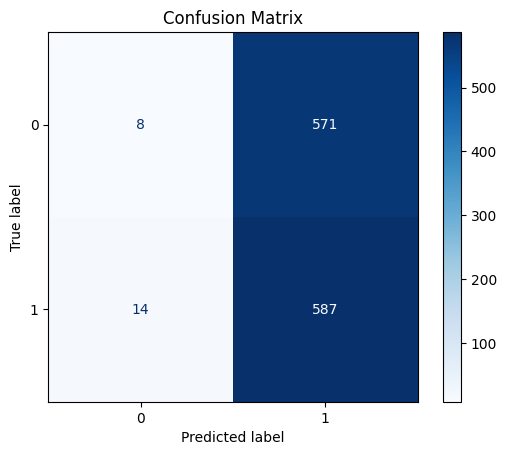

              precision    recall  f1-score   support

           0       0.36      0.01      0.03       579
           1       0.51      0.98      0.67       601

    accuracy                           0.50      1180
   macro avg       0.44      0.50      0.35      1180
weighted avg       0.44      0.50      0.35      1180



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict class probabilities on validation set
y_pred_probs = model2.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_val, y_pred))

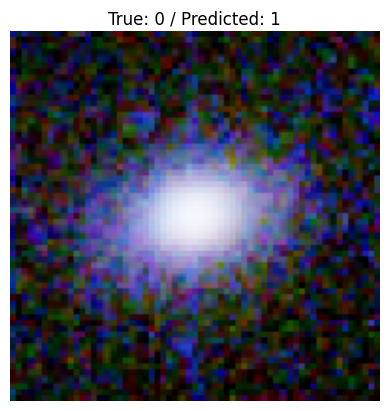

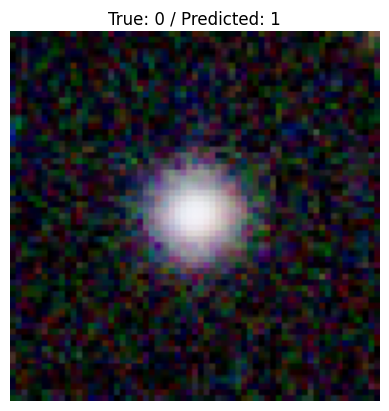

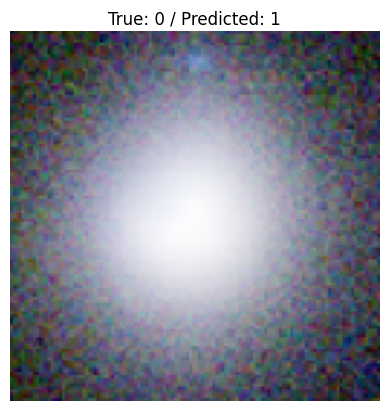

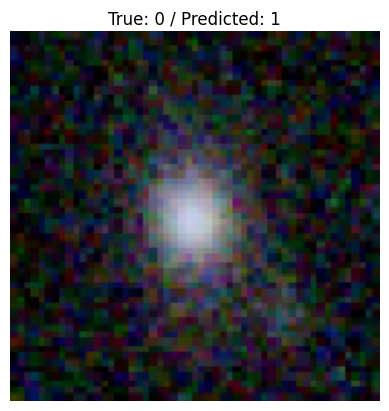

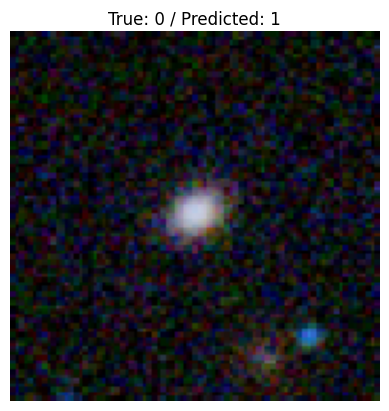

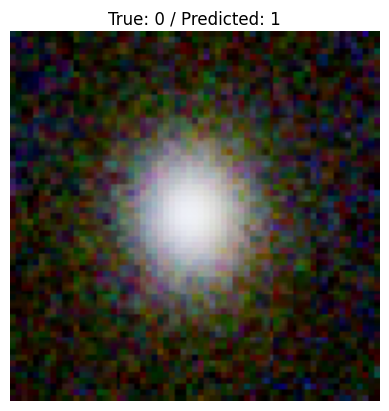

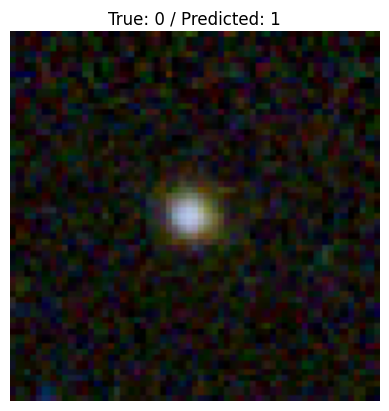

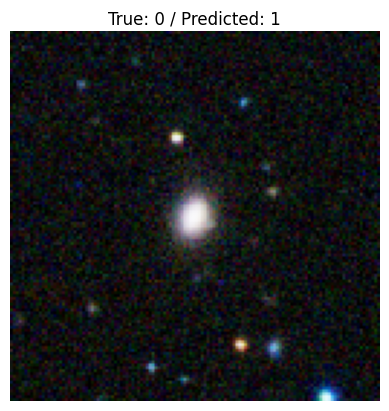

In [ ]:
import matplotlib.pyplot as plt

# Indices of incorrect predictions
wrong_idx = np.where(y_pred.reshape(-1) != y_val)[0]

# Show first 8 wrong predictions
for i, idx in enumerate(wrong_idx[:8]):
    plt.imshow(X_val[idx])
    plt.title(f"True: {y_val[idx]} / Predicted: {y_pred[idx][0]}")
    plt.axis('off')
    plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18']
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


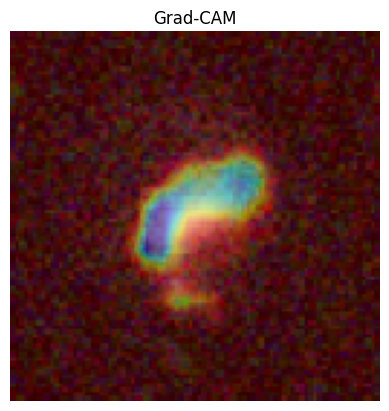

In [ ]:
import tensorflow as tf
img = X_val[100]
input_image = np.expand_dims(img, axis=0)
target_layer = model2.get_layer('last_conv')

grad_model = tf.keras.models.Model([model2.input], [target_layer.output, model2.output])
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(input_image)
    loss = predictions[:, 0]

grads = tape.gradient(loss, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
heatmap = tf.reduce_sum(pooled_grads * conv_outputs[0], axis=-1)

heatmap = np.maximum(heatmap, 0)
heatmap /= tf.reduce_max(heatmap)
heatmap_resized = cv2.resize(heatmap.numpy(), (img.shape[1], img.shape[0]))
heatmap_resized = np.uint8(255 * heatmap_resized)
heatmap_color = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted((img * 255).astype('uint8'), 0.6, heatmap_color, 0.4, 0)

plt.imsave("gradcam_output.png", superimposed_img)
plt.imshow(superimposed_img)
plt.axis('off')
plt.title("Grad-CAM")
plt.show()

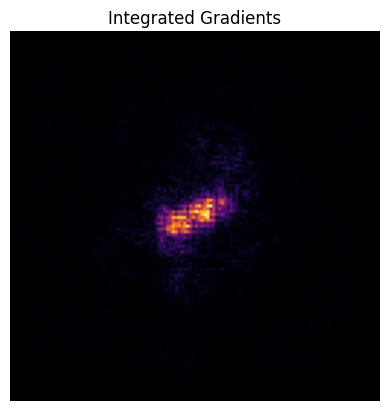

In [ ]:
def interpolate_images(baseline, image, alphas):
    alphas_x = alphas[:, tf.newaxis, tf.newaxis, tf.newaxis]
    delta = image - baseline
    return baseline + alphas_x * delta

def compute_ig(model, baseline, image, target_index=None, m_steps=50):
    alphas = tf.linspace(0.0, 1.0, m_steps)
    interpolated_images = interpolate_images(baseline, image, alphas)

    with tf.GradientTape() as tape:
        tape.watch(interpolated_images)
        preds = model(interpolated_images)
        if target_index is None:
            target_index = tf.argmax(preds[-1])
        outputs = preds[:, target_index]

    grads = tape.gradient(outputs, interpolated_images)
    avg_grads = tf.reduce_mean(grads, axis=0)
    integrated_grads = (image - baseline) * avg_grads
    return integrated_grads

img = X_val[100]
input_image = tf.convert_to_tensor(np.expand_dims(img, axis=0), dtype=tf.float32)
baseline = tf.zeros(shape=(1, 128, 128, 3))
ig_attributions = compute_ig(model2, baseline, input_image)[0]

ig_attributions = tf.reduce_sum(tf.math.abs(ig_attributions), axis=-1)
ig_attributions = ig_attributions / tf.reduce_max(ig_attributions)

plt.imshow(ig_attributions, cmap='inferno')
plt.axis('off')
plt.title('Integrated Gradients')
plt.savefig('ig_output.png')
plt.show()

plt.imsave('original_image.png', X_val[100])

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=eed8f79ea46c2dd97cc9697e900045d227eb7a86a0097a47206a0ba85c2d7bf9
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1

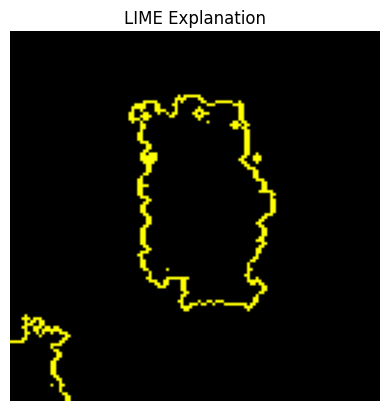

In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    image=X_val[100],
    classifier_fn=lambda x: model2.predict(x),
    top_labels=1,
    hide_color=0,
    num_samples=1000
)

temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=True,
    hide_rest=False,
    num_features=5,
    min_weight=0.0
)

lime_image = mark_boundaries(temp / 255.0, mask)
plt.imshow(lime_image)
plt.axis('off')
plt.title('LIME Explanation')
plt.savefig('lime_output.png')
plt.show()